# Notacion Big O
La notacion Big O nos permite medir la eficiencia de un algoritmo en funcion del tamaño de la entrada, desde dos puntos de vista: **el uso de memoria** (complejidad espacial) y el **tiempo de ejecucion** (complejidad temporal). 

Veamos algunas de las notaciones mas comunes:

| Notacion | Lectura | Descripcion | 
|----------|---------|-------------|
| O(1) | "O de 1" (Tiempo constante) | Una operación que se ejecuta siempre en el mismo tiempo, **sin importar el tamaño de la entrada.** | 
| O(log n) | "O logaritmico" | El tiempo de ejecución crece logarítmicamente a medida que aumenta el tamaño de la entrada. Es decir, crece muy lentamente. |
| O(n) | "O de n" (Tiempo lineal) | El tiempo de ejecución crece en **proporción directa al tamaño de la entrada.** |
| O(n**2) | "O de n al cuadrado" (Tiempo cuadratico) | El tiempo de ejecución crece **cuadráticamente** con respecto al tamaño de la entrada. Muy común en algoritmos con bucles anidados. |

## Ejemplo practico
Ahora veremos como la complejidad afecta a diferentes algoritmos con un mismo proposito, "simple" en principio: encontrar elementos comunes entre dos listas.

Para dos listas:

A -> [1,2,3,4]

B -> [3,4,5,6]

El algortimo debera de retornar todos los elementos comunes entre las dos: [3,4]

Dado el caso de que no existan elementos en comun retornar una lista vacia: []

¡A darle!

In [1]:
A: list[int | float] = [1, 2, 3, 4]
B: list[int | float] = [3, 4, 5, 6]

EXPECTED_RESULT: list[int | float] = [3, 4]

## O de n al cuadrado (Tiempo cuadratico)

In [2]:
def get_commons_n2(a: list[int | float], b: list[int | float]) -> list[int | float]:
    """
    Devuelve los elementos comunes entre dos listas utilizando un enfoque de fuerza bruta O(n²).

    Esta función compara cada elemento de la primera lista con cada elemento de la segunda
    lista para encontrar los valores que aparecen en ambas. La comparación se realiza utilizando
    igualdad (`==`).

    Args:
        a (list[int | float]): Primera lista de números.
        b (list[int | float]): Segunda lista de números.

    Returns:
        list[int | float]: Una lista de valores que están presentes tanto en `a` como en `b`.
    """
    commons: list[int | float] = list()
    for number_a in a:
        for number_b in b:
            if number_a == number_b:
                commons.append(number_a)  # solo el numero en a ya que son iguales
    return commons

In [3]:
(
    (get_commons_n2(A, B) == EXPECTED_RESULT)
    & (get_commons_n2([], []) == [])  # miremos caso listas vacias
    & (get_commons_n2([1, 2, 3, 4], [5, 6, 7]) == [])  # caso no elementos comunes
)

True

## O de n (Tiempo lineal)

In [4]:
def get_commons_n(a: list[int | float], b: list[int | float]) -> list[int | float]:
    """
    Devuelve los elementos comunes entre dos listas utilizando la intersección de conjuntos (O(n)).

    Esta función convierte ambas listas en conjuntos y devuelve la intersección como una lista.
    Es significativamente más rápida que el enfoque O(n²) cuando se trabaja con entradas grandes.

    Args:
        a (list[int | float]): Primera lista de números.
        b (list[int | float]): Segunda lista de números.

    Returns:
        list[int | float]: Una lista de valores que están presentes tanto en `a` como en `b`.
    """
    return list(set(a).intersection(set(b)))

In [5]:
(
    (get_commons_n(A, B) == EXPECTED_RESULT)
    & (get_commons_n([], []) == [])  # miremos caso listas vacias
    & (get_commons_n([1, 2, 3, 4], [5, 6, 7]) == [])  # caso no elementos comunes
)

True

## O de n logaritmo de n

In [6]:
from bisect import bisect_left

In [7]:
def binary_search(arr: list[int | float], x: int):
    """
    Realiza una búsqueda binaria en una lista ordenada para encontrar un elemento específico.

    Esta función utiliza el método `bisect_left` del módulo `bisect` para encontrar la posición
    donde el elemento `x` debe ser insertado para mantener la lista ordenada, y luego verifica si
    el elemento está realmente presente en esa posición.

    Args:
        arr (list[int | float]): Lista ordenada de números en la que se realizará la búsqueda.
        x (int | float): El elemento que se busca en la lista.

    Returns:
        bool: True si el elemento `x` se encuentra en la lista `arr`, False en caso contrario.
    """
    i = bisect_left(arr, x)
    return i < len(arr) and arr[i] == x


def get_commons_logn(a: list[int | float], b: list[int | float]) -> list[int | float]:
    """
    Devuelve los elementos comunes entre dos listas utilizando búsqueda binaria.
    Complejidad de O(n log n) si se ordena la lista.

    LA BUSQUEDA BINARIA REQUIERE QUE LA LISTA ESTÉ ORDENADA, POR LO QUE SE DEBE ORDENAR `b`, EN CASO DE QUE NO LO ESTE, ANTES DE REALIZAR LA BÚSQUEDA.

    Esta función primero ordena la lista `b` y luego utiliza búsqueda binaria para encontrar cada
    elemento de `a` en `b`. Es más eficiente que el enfoque de fuerza bruta O(n^2), especialmente
    para listas grandes.

    Args:
        a (list[int | float]): Primera lista de números.
        b (list[int | float]): Segunda lista de números (esta lista será ordenada antes de la búsqueda).

    Returns:
        list[int | float]: Una lista de valores que están presentes en ambas listas, `a` y `b`.
    """
    b.sort()
    return [x for x in a if binary_search(b, x)]

In [8]:
(
    (get_commons_n(A, B) == EXPECTED_RESULT)
    & (get_commons_n([], []) == [])  # miremos caso listas vacias
    & (get_commons_n([1, 2, 3, 4], [5, 6, 7]) == [])  # caso no elementos comunes
)

True

## Comparando el rendimiento
Finalmente, comparemos como cambia el rendimiento entre las funciones en funcion del tamaño de la entrada, para asi poder determinar cual de ellas es mejor o mas eficiente.

In [9]:
from timeit import repeat

import matplotlib.pyplot as plt
import numpy as np

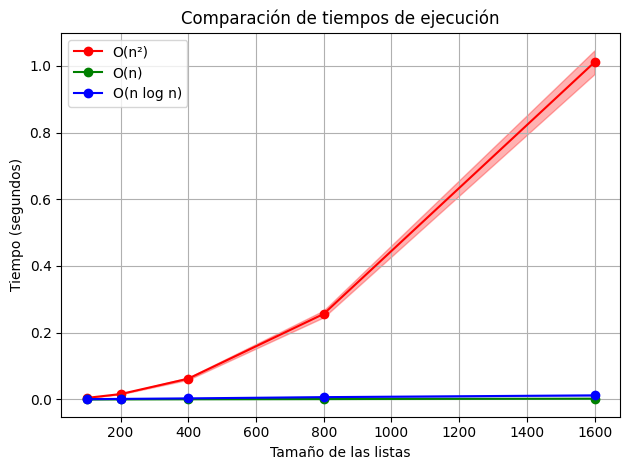

In [10]:
sizes: list[int] = [100, 200, 400, 800, 1600]
times_n2, times_n, times_logn = list(), list(), list()
std_n2, std_n, std_logn = list(), list(), list()

setup = """
from __main__ import {fn}
a,b = {a}, {b}
"""

for size in sizes:
    a: list[int] = [item for item in range(1, size + 1)]
    b: list[int] = [item for item in range(3, size + 3)]

    results_n2: list[float] = repeat(
        "get_commons_n2(a,b)",
        setup=setup.format(fn="get_commons_n2", a=a, b=b),
        number=30,
        repeat=50,
    )
    results_n: list[float] = repeat(
        "get_commons_n(a,b)", setup=setup.format(fn="get_commons_n", a=a, b=b), number=30, repeat=50
    )
    results_logn: list[float] = repeat(
        "get_commons_logn(a,b)",
        setup=setup.format(fn="get_commons_logn", a=a, b=b),
        number=30,
        repeat=50,
    )

    times_n2.append(np.mean(results_n2))
    times_n.append(np.mean(results_n))
    times_logn.append(np.mean(results_logn))
    std_n2.append(np.std(results_n2))
    std_n.append(np.std(results_n))
    std_logn.append(np.std(results_logn))

# O(n²)
plt.plot(sizes, times_n2, "o-", color="red", label="O(n²)")
plt.fill_between(
    sizes,
    np.array(times_n2) - np.array(std_n2),
    np.array(times_n2) + np.array(std_n2),
    color="red",
    alpha=0.3,
)

# O(n)
plt.plot(sizes, times_n, "o-", color="green", label="O(n)")
plt.fill_between(
    sizes,
    np.array(times_n) - np.array(std_n),
    np.array(times_n) + np.array(std_n),
    color="green",
    alpha=0.3,
)

# O(log n)
plt.plot(sizes, times_logn, "o-", color="blue", label="O(n log n)")
plt.fill_between(
    sizes,
    np.array(times_logn) - np.array(std_logn),
    np.array(times_logn) + np.array(std_logn),
    color="blue",
    alpha=0.3,
)

plt.title("Comparación de tiempos de ejecución")
plt.xlabel("Tamaño de las listas")
plt.ylabel("Tiempo (segundos)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Resultados
Podemos ver claramente el terrible rendimiento que da nuestra funcion cuadratica.

Tal y como se esperaba O(n) y O(n log n) son muy similares en cuanto a rendimiento, O(n log n) siendo peor al mostrar señales de aumento en el tiempo de ejecucion para entradas mas grandes. 